In [ ]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras as krs

In [ ]:
mnist = krs.datasets.mnist

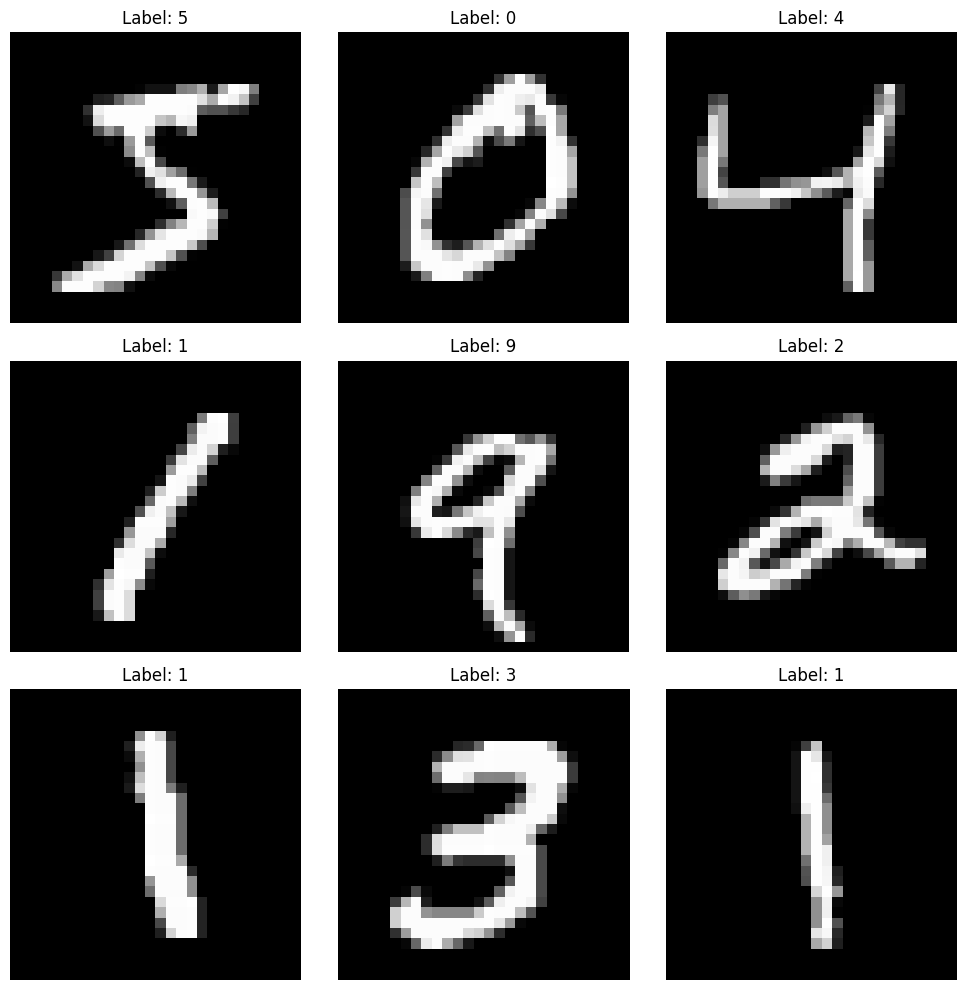

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the first 9 images in the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)  # Create a grid of 3x3
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hide axes for a cleaner look

plt.tight_layout()
plt.show()


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Calculate the mean and standard deviation of the training data
mean = np.mean(x_train)
std_dev = np.std(x_train)

print(f"Mean of the training data: {mean}")
print(f"Standard deviation of the training data: {std_dev}")

Mean of the training data: 0.1306604762738429
Standard deviation of the training data: 0.3081078038564622


In [ ]:
# model = krs.Sequential([
#     krs.layers.Flatten(input_shape=(28, 28)),
#     krs.layers.Dense(128, activation='relu'),
#     krs.layers.Dense(10, activation='softmax')
# ])


model = krs.Sequential([
    krs.layers.Flatten(input_shape=(28, 28)),
    krs.layers.Dense(32, activation='relu'),
    krs.layers.Dense(64, activation='relu'),
    krs.layers.Dense(32, activation='relu'),
    krs.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epoch = 20

In [ ]:
model.fit(x_train, y_train, epochs = epoch)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8229 - loss: 0.5642
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9495 - loss: 0.1671
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9616 - loss: 0.1263
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1038
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9735 - loss: 0.0847
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9762 - loss: 0.0749
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0675
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9793 - loss: 0.0619
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9830 - loss: 0.0532
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0520
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0463
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9674 - loss: 0.1416


In [ ]:
print("Accuracy ---> ", test_acc)
print("Loss ---> ", test_loss)

Accuracy --->  0.9707000255584717
Loss --->  0.12843021750450134


In [ ]:
print(model.input_shape)


(None, 28, 28)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean value in handwrittendigitrecognitian0.png: 0.061224489795918366
Max value in handwrittendigitrecognitian0.png: 1.0
Min value in handwrittendigitrecognitian0.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


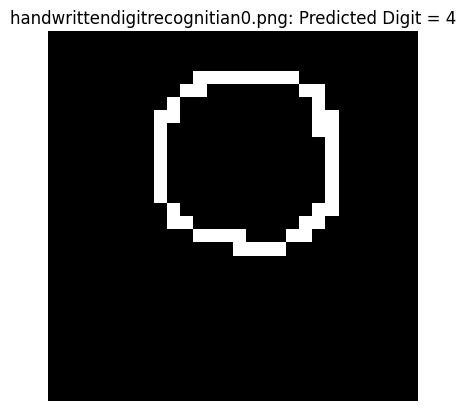

Mean value in handwrittendigitrecognitian5.png: 0.06505102040816327
Max value in handwrittendigitrecognitian5.png: 1.0
Min value in handwrittendigitrecognitian5.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


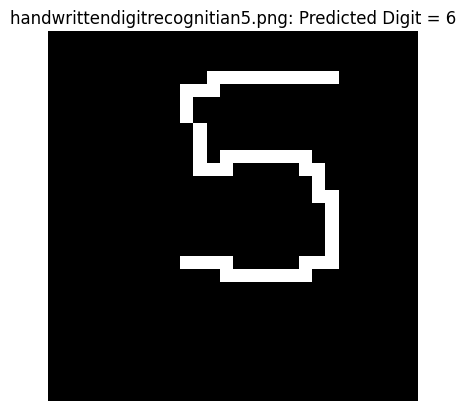

Mean value in handwrittendigitrecognitian8.png: 0.10331632653061225
Max value in handwrittendigitrecognitian8.png: 1.0
Min value in handwrittendigitrecognitian8.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


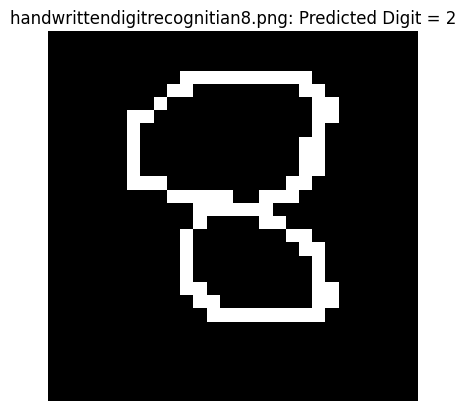

Mean value in handwrittendigitrecognitian2.png: 0.06887755102040816
Max value in handwrittendigitrecognitian2.png: 1.0
Min value in handwrittendigitrecognitian2.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


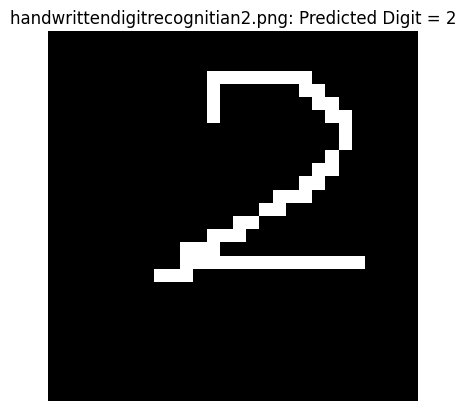

Mean value in handwrittendigitrecognitian7.png: 0.16748199279711887
Max value in handwrittendigitrecognitian7.png: 1.0
Min value in handwrittendigitrecognitian7.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


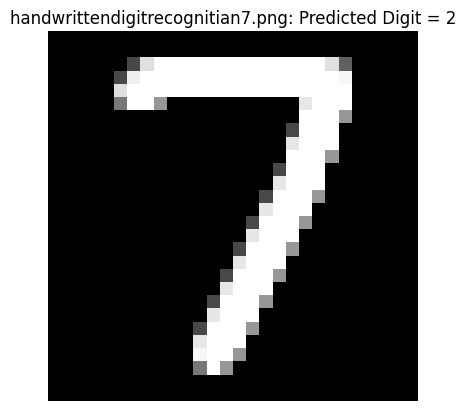

Mean value in handwrittendigitrecognitian4.png: 0.07142857142857142
Max value in handwrittendigitrecognitian4.png: 1.0
Min value in handwrittendigitrecognitian4.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


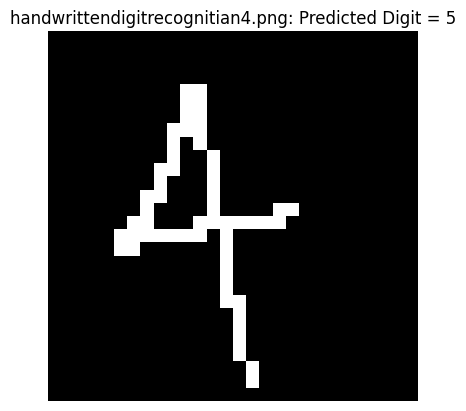

Mean value in handwrittendigitrecognitian6.png: 0.07015306122448979
Max value in handwrittendigitrecognitian6.png: 1.0
Min value in handwrittendigitrecognitian6.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


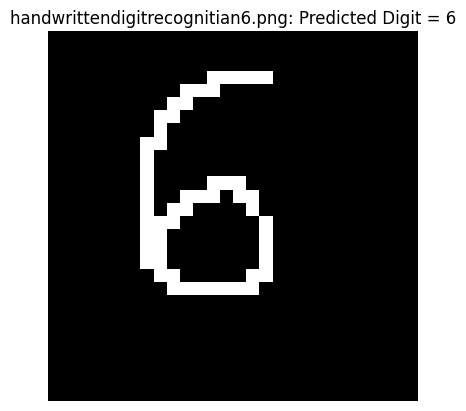

Mean value in handwrittendigitrecognitian3.png: 0.07397959183673469
Max value in handwrittendigitrecognitian3.png: 1.0
Min value in handwrittendigitrecognitian3.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


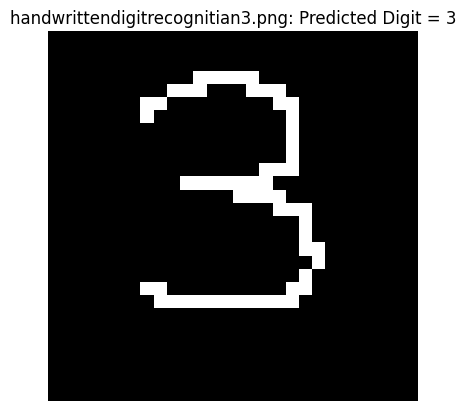

Mean value in handwrittendigitrecognitian1.png: 0.026785714285714284
Max value in handwrittendigitrecognitian1.png: 1.0
Min value in handwrittendigitrecognitian1.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


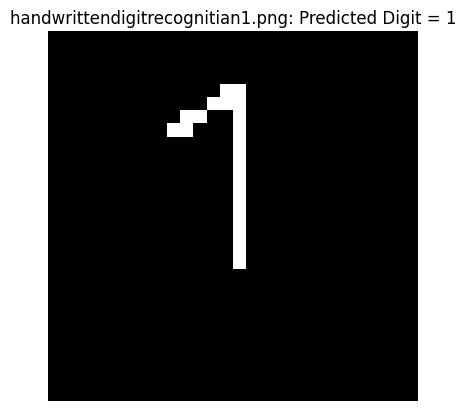

Mean value in handwrittendigitrecognitian9.png: 0.08163265306122448
Max value in handwrittendigitrecognitian9.png: 1.0
Min value in handwrittendigitrecognitian9.png: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


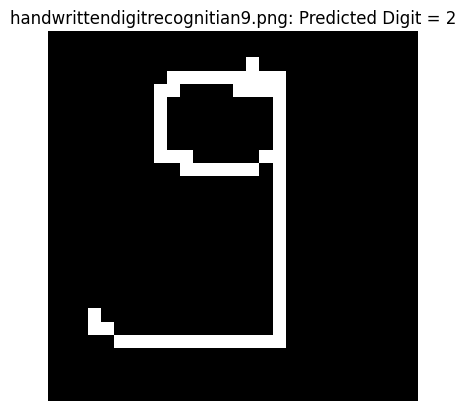

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Iterate through the files in the directory
for filename in os.listdir('/content/drive/MyDrive/digitrecog'):
    img_path = f"/content/drive/MyDrive/digitrecog/{filename}"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: {filename} could not be loaded.")
        continue  # Skip to the next file

    img = cv2.bitwise_not(img)
    # Normalize and reshape the image
    img = img / 255.0
    # print mean, max and min values
    print(f"Mean value in {filename}: {np.mean(img)}")
    print(f"Max value in {filename}: {np.max(img)}")
    print(f"Min value in {filename}: {np.min(img)}")


    img_resized = img.reshape(1, 28, 28)

    # Predict the digit using the model
    pred = model.predict(img_resized)
    predicted_digit = np.argmax(pred)

    # Display the image and prediction
    plt.figure()
    plt.imshow(img, cmap='gray')  # Display the image in grayscale
    plt.title(f"{filename}: Predicted Digit = {predicted_digit}")
    plt.axis('off')  # Turn off the axes for better visualization
    plt.show()
